In [15]:
#!pip install pandas 
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn
#!pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np


In [16]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [22]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)
df.drop(columns=['BMI'], inplace=True)

In [23]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

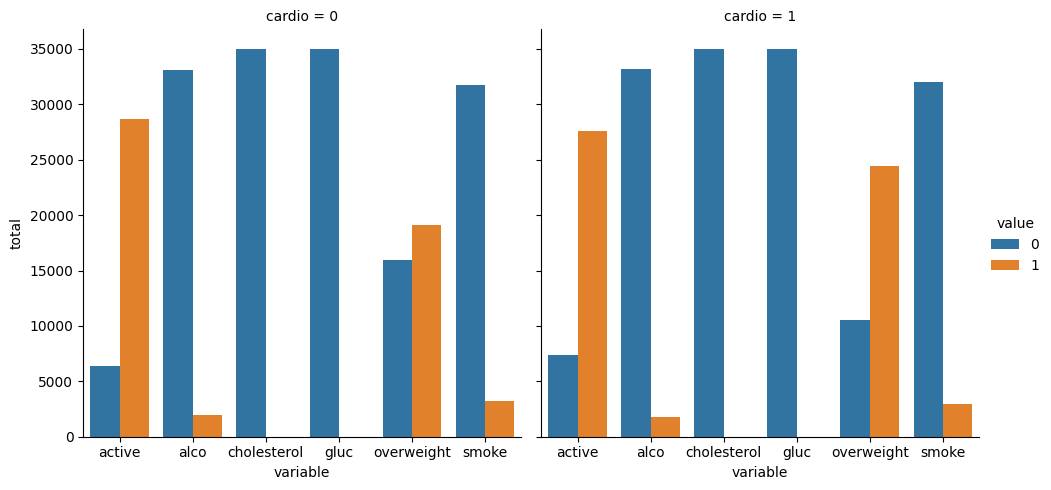

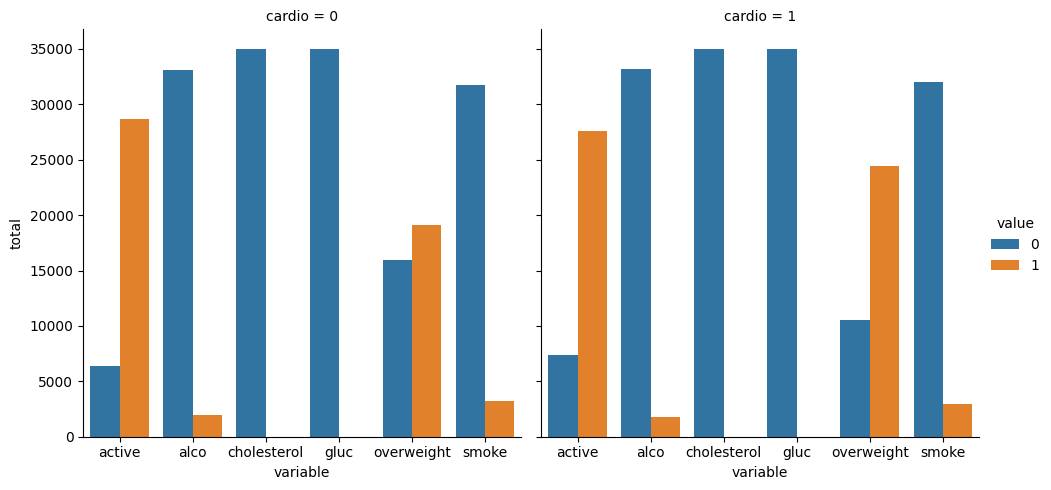

In [28]:
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # 8
    df_cat['total'] = 1
    df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index = False).count()
    # 9
    fig = sns.catplot(x = 'variable', y = 'total', data = df_cat, hue = 'value', kind = 'bar', col = 'cardio').fig
    
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

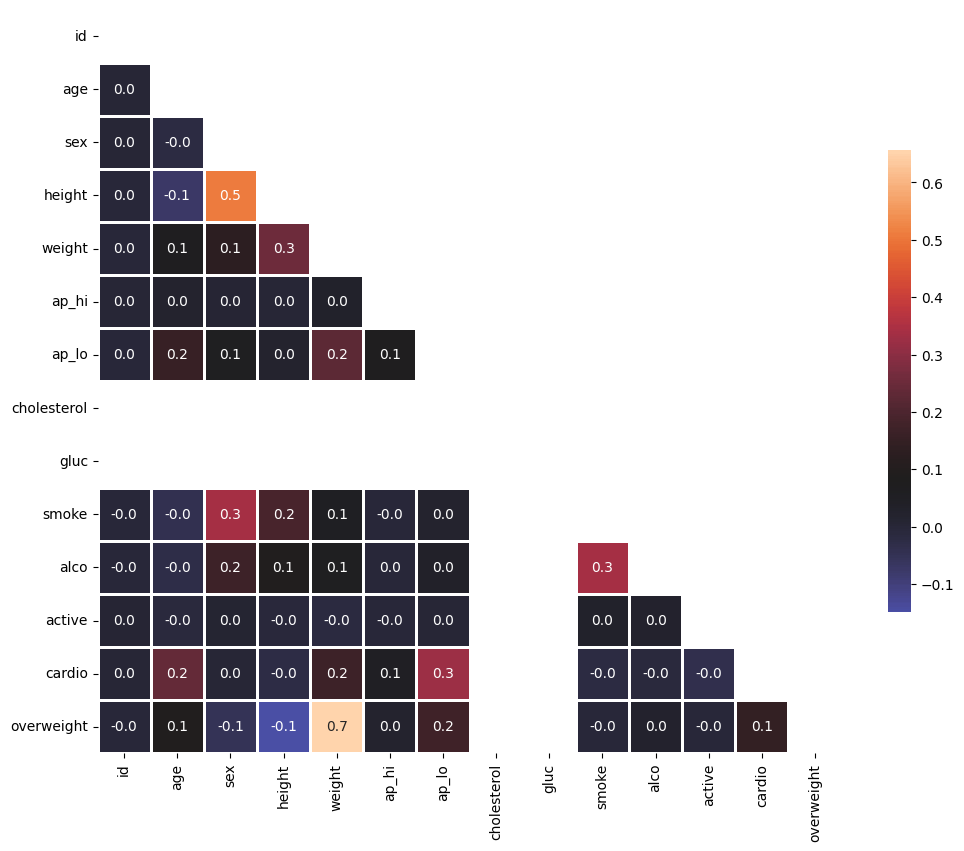

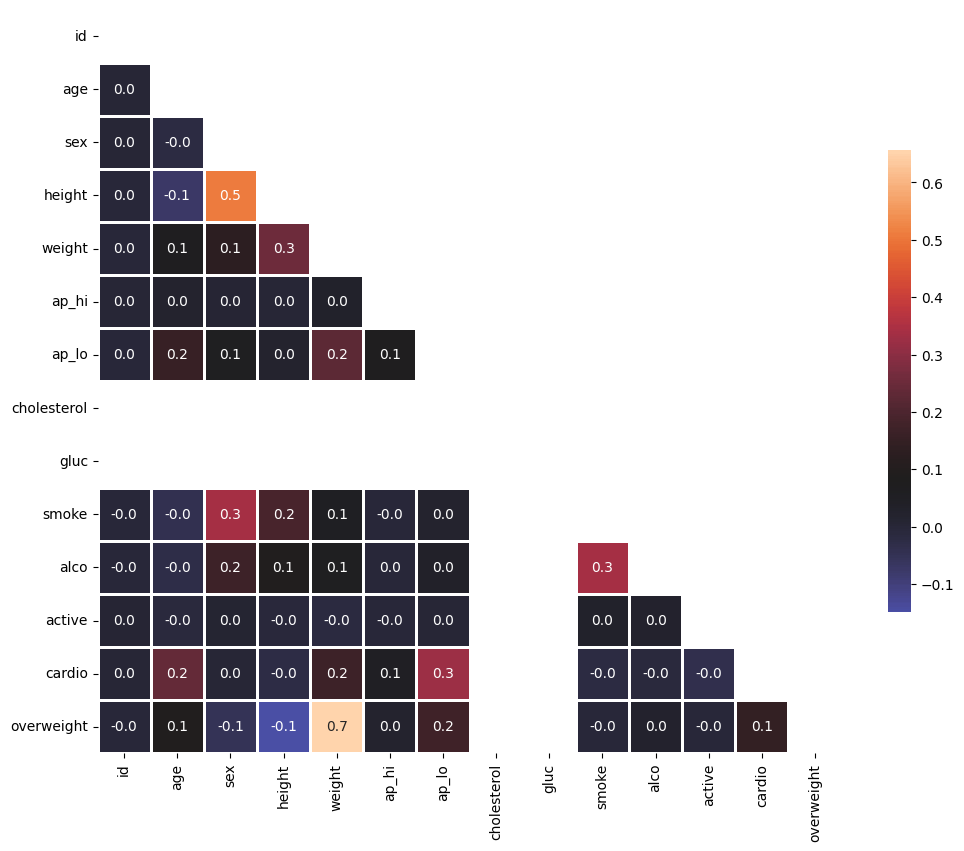

In [32]:
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12
    corr = df_heat.corr(method = 'pearson')

    # 13
    mask = np.triu(corr)

    

    # 14
    fig, ax = plt.subplots(figsize=(12, 12))

    # 15
    sns.heatmap(corr, linewidths = 1, annot = True, square =True, mask = mask, fmt = ".1f", center = 0.08, cbar_kws = {"shrink": 0.5})


    # 16
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()

In [7]:
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]
    df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1


In [13]:
df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat['total'] = 1
df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index = False).count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,35021
5,0,gluc,0,35021
6,0,overweight,0,15915
7,0,overweight,1,19106
8,0,smoke,0,31781
9,0,smoke,1,3240
